In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
from python.functions import *
from python.models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-01-26 16:51:59.229872: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-26 16:51:59.254038: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-01-26 16:51:59.254193: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-01-26 16:51:59.255495: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-26 16:51:59.257110: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-01-26 16:51:59.257304: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

In [3]:
stream = "mock"

In [4]:
df, file = load_file(stream = stream)

### Prepare datasets for training

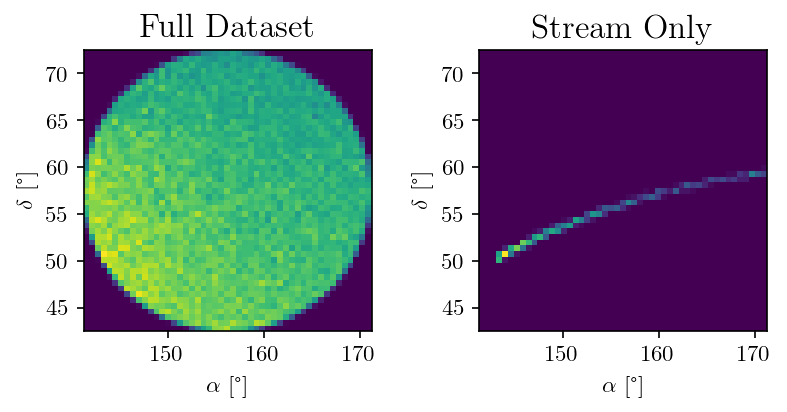

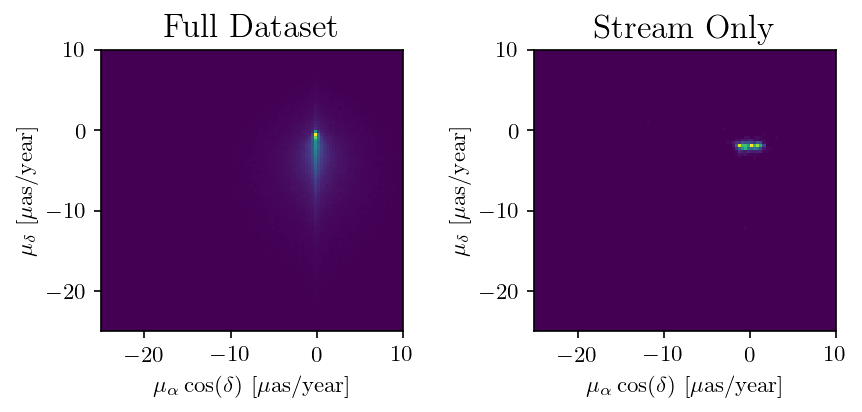

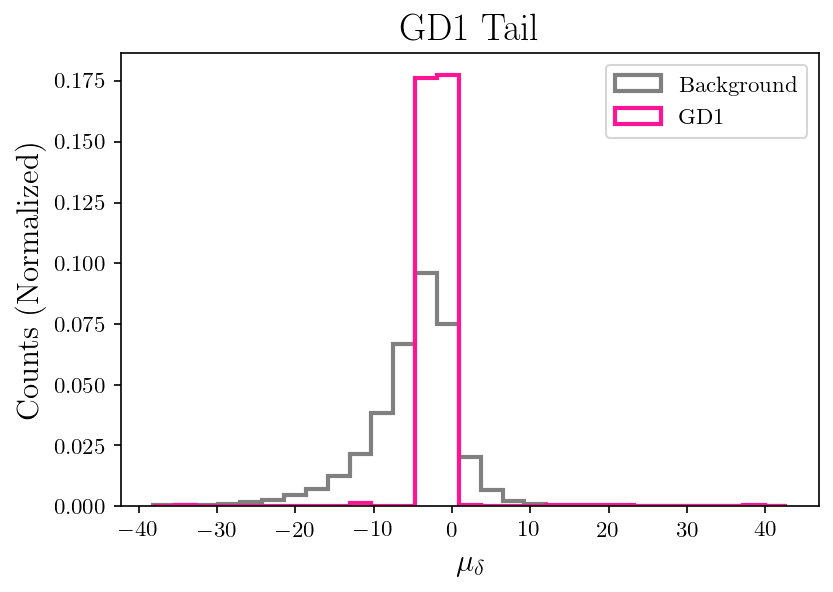

In [7]:
visualize_stream(df)

Sideband region: [-3.0,-0.7]
Signal region: [-2.4,-1.2]
Total counts: SR = 52,071, SB = 51,607


/clusterfs/ml4hep/mpettee/GaiaCWoLa/notebooks/../python/functions.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)
No handles with labels found to put in legend.


Signal region has 750 stream and 51,321 bkg events (1.46%).
Sideband region has 68 stream and 51,539 bkg events (0.13%).
f_sig = 11.1X f_sideband.


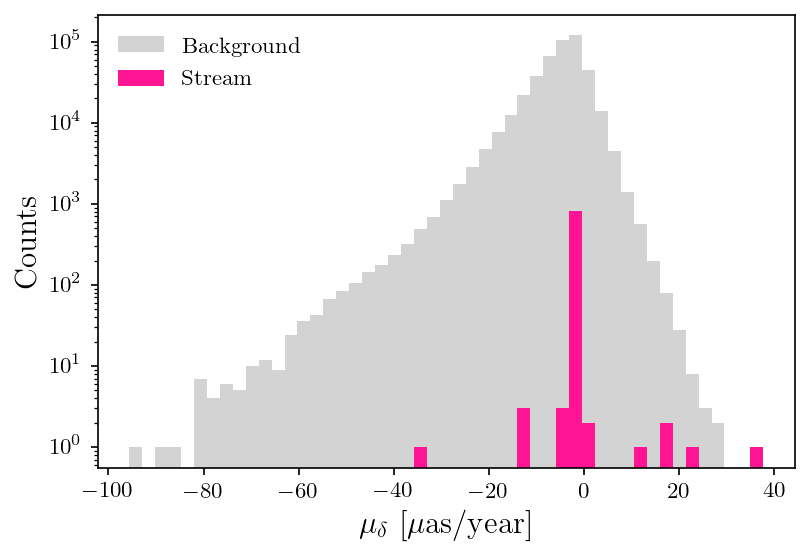

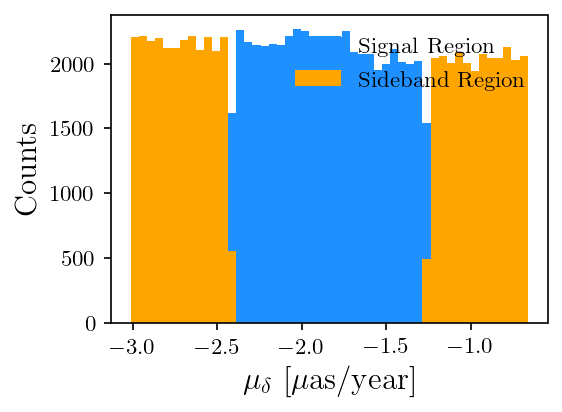

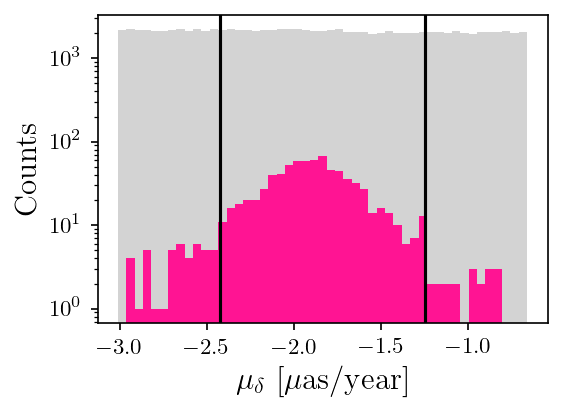

In [8]:
df = signal_sideband(df, stream = stream)

# Train

In [9]:
tf.keras.backend.clear_session()

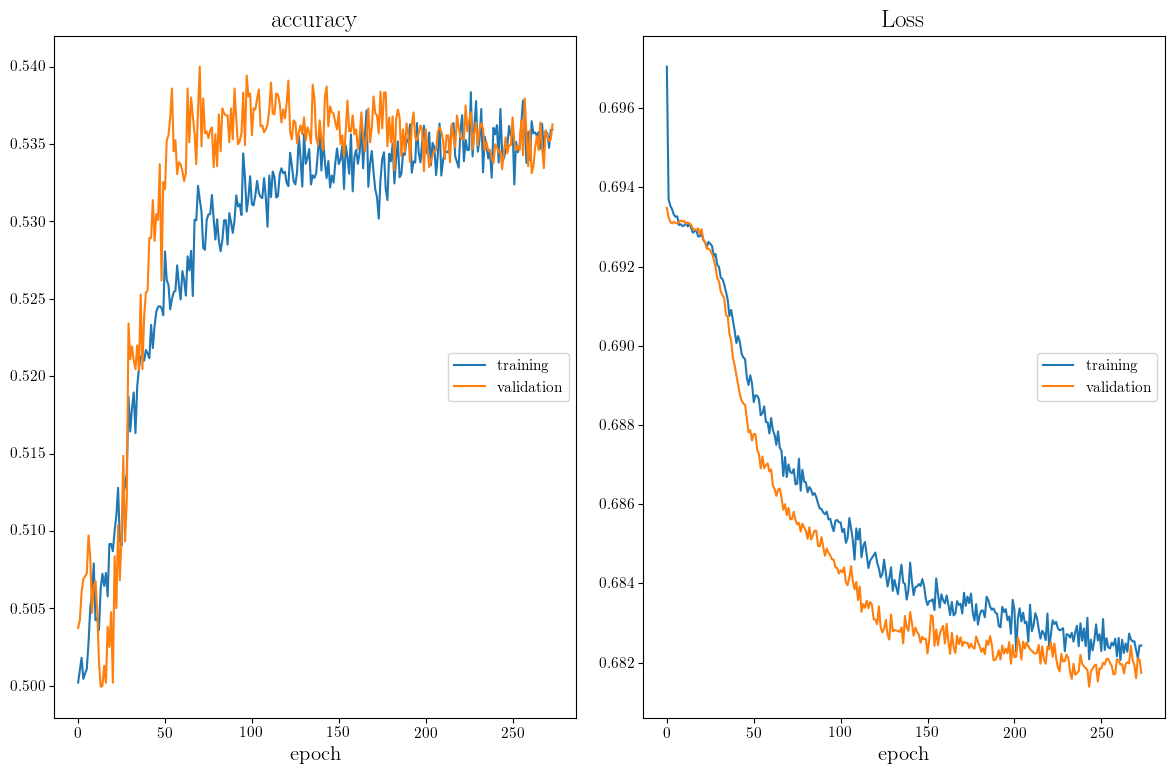

accuracy
	training         	 (min:    0.500, max:    0.538, cur:    0.536)
	validation       	 (min:    0.500, max:    0.540, cur:    0.536)
Loss
	training         	 (min:    0.682, max:    0.697, cur:    0.682)
	validation       	 (min:    0.681, max:    0.693, cur:    0.682)
73/73 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5359 - val_loss: 0.6817 - val_accuracy: 0.5363
Best losses: [0.6820648908615112]
Loading weights from best loop, i.e. loop #0.
AUC: 0.555
Maximum purity of 100.0% at 0.01%
Top 10 stars: Purity = 100.0% 
Top 20 stars: Purity = 100.0% 
Top 50 stars: Purity = 86.0% 
Top 100 stars: Purity = 63.0% 


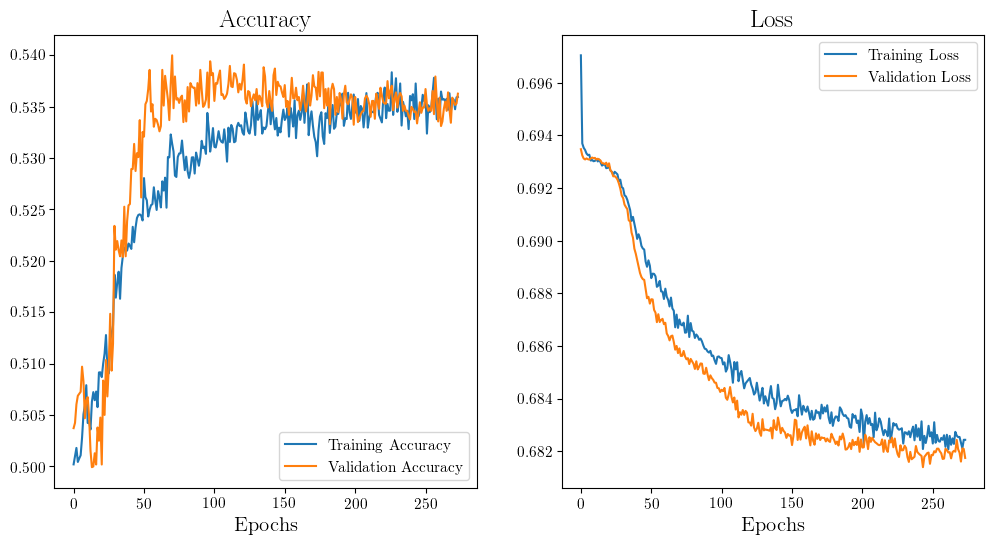

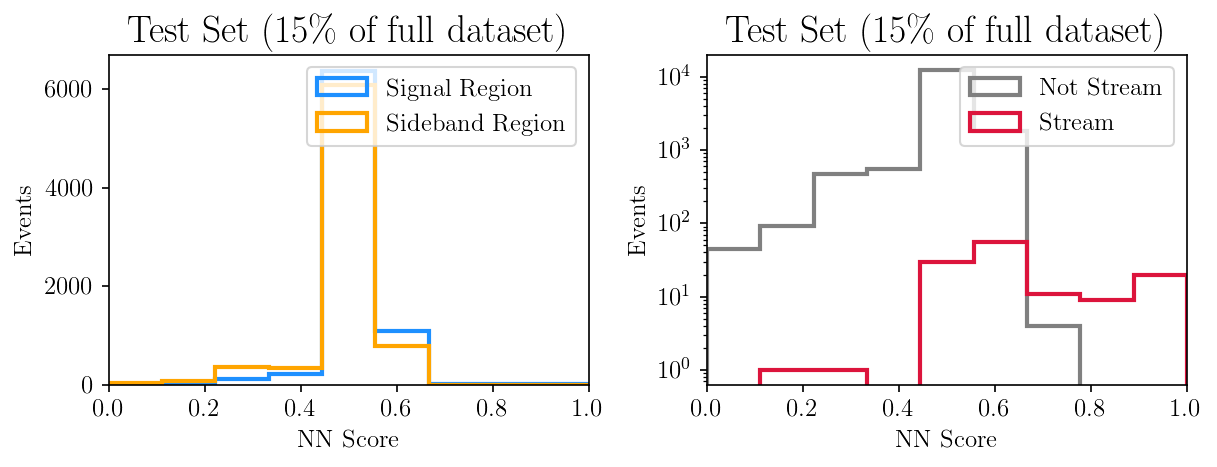

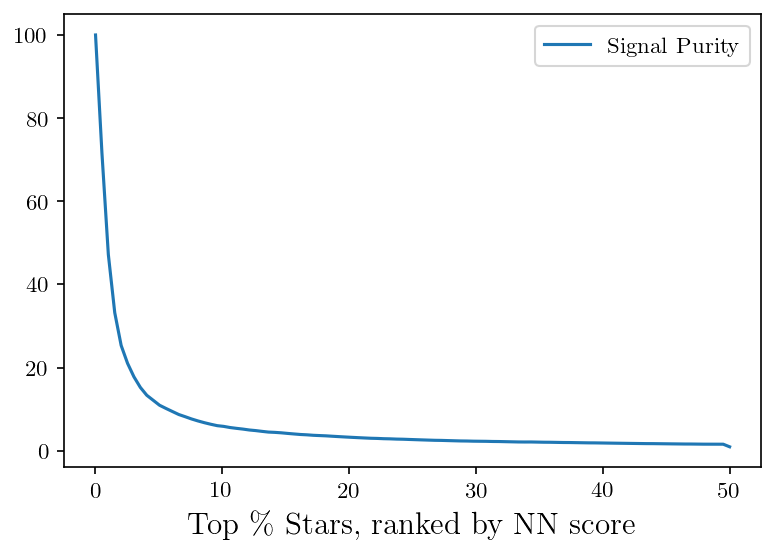

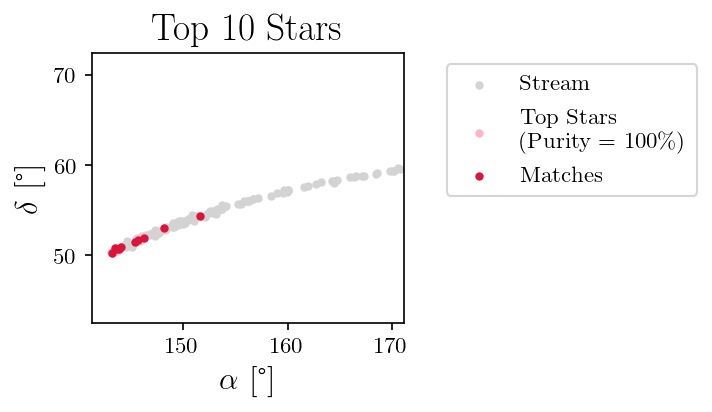

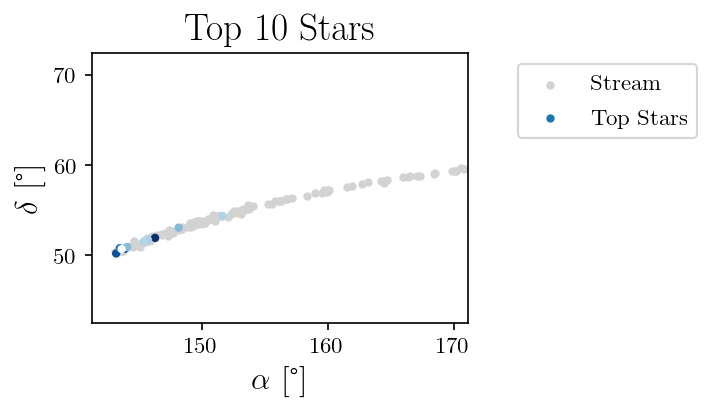

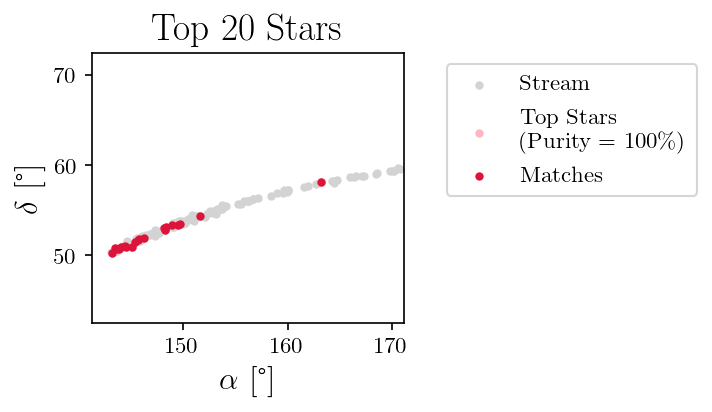

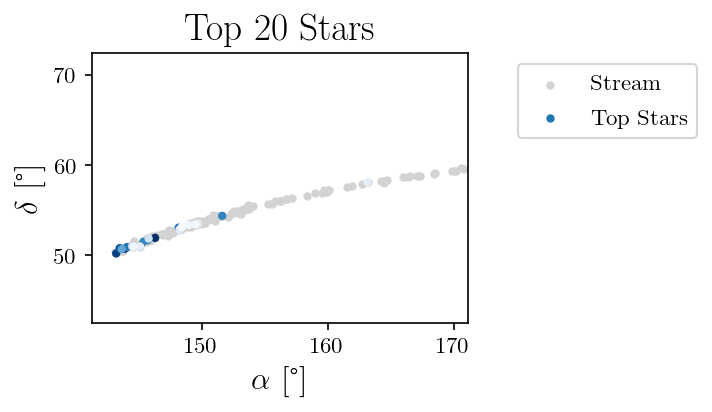

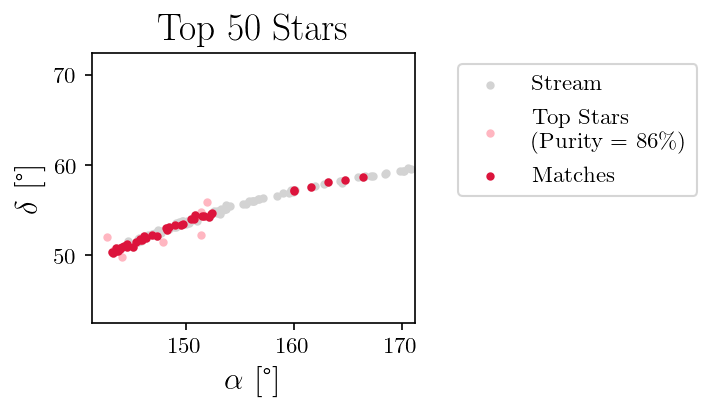

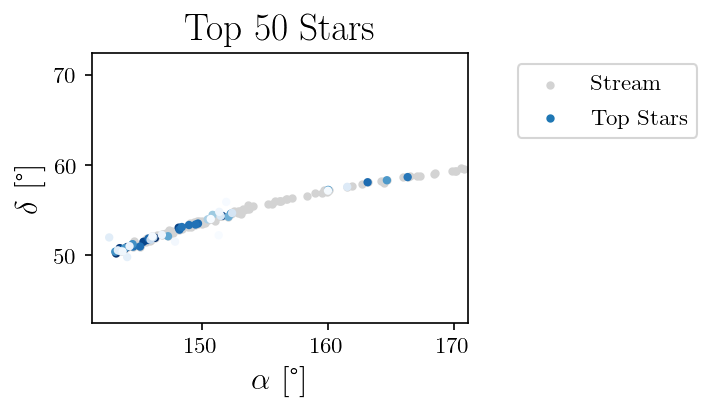

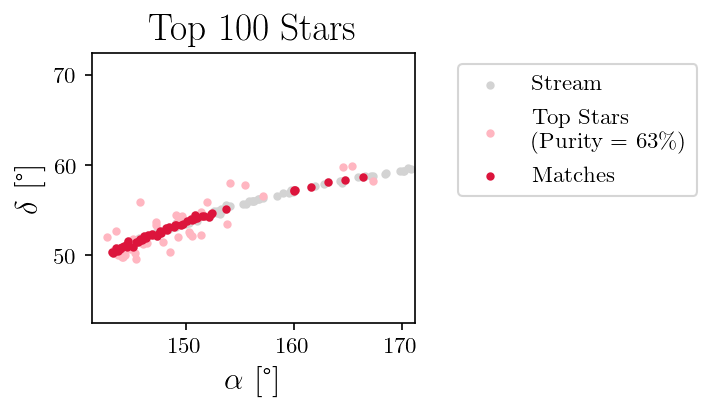

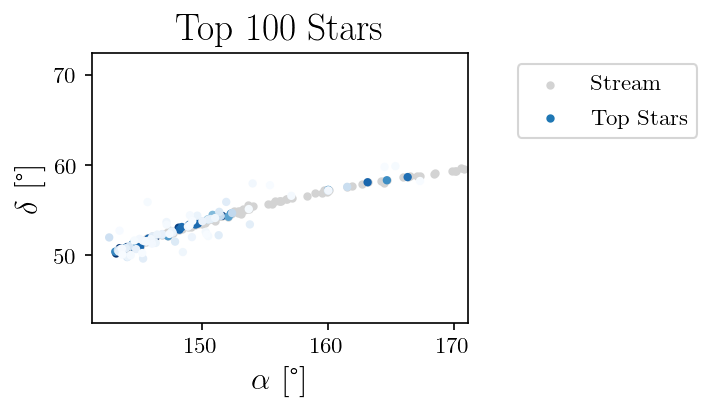

In [10]:
test = train(df, 
      n_folds = 1, 
      best_of_n_loops = 1,
      layer_size = 32, 
      batch_size = 1000, 
      dropout = 0.2, 
      epochs = 2000, 
      patience = 30)